In [100]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [202]:
class KNNRegression(torch.nn.Module):

    def __init__(self, *args, **kwargs):
        super(KNNRegression, self).__init__(*args, **kwargs)

    def train(self, X, Y):
        self.X = X
        self.Y = Y

    @staticmethod
    def distance(x1, x2):
        if x2.shape[0] == x2.size:
            return np.array([np.sqrt( (xi-x1)**2 ) for xi in x2])
        return np.linalg.norm(x2-x1, axis=1)

    @staticmethod
    def WAM(X, W):
        """ weighted_arifmetic_mean """
        return np.sum(X*W)/np.sum(W)

    def predict(self, X, k=2):
        y_end = []
        yp = pd.DataFrame(self.Y)
        t = 0
        for xi in X:
            dp = pd.DataFrame(self.distance(xi, self.X))
            d = pd.concat((dp,yp), axis=1, ignore_index=True, names=[0,1])
            d = pd.DataFrame.sort_values(d, 0).reset_index(drop=True)[:k]
            a = self.WAM(np.array(d[1]),np.array(1/d[0]))
            y_end.append(a)
        return y_end           


In [173]:
A = np.random.randint(-50,50, 100).reshape(25,4)
Y = np.random.randint(-100, 100, 25)
A = KNN_W.distance(np.array([0,0,0,0]), A)
Y = pd.DataFrame(Y)
p = pd.DataFrame(A)
p = pd.concat((p,Y), axis=1, ignore_index=True, names=[0,1])
d = pd.DataFrame.sort_values(p, by=0).reset_index(drop=True)
dd = d[:3]
dd

,0,1
0,23.748684,74
1,32.341923,-98
2,37.202150,3


In [145]:
from sklearn.datasets import make_gaussian_quantiles, make_blobs, make_moons
from sklearn.model_selection import train_test_split

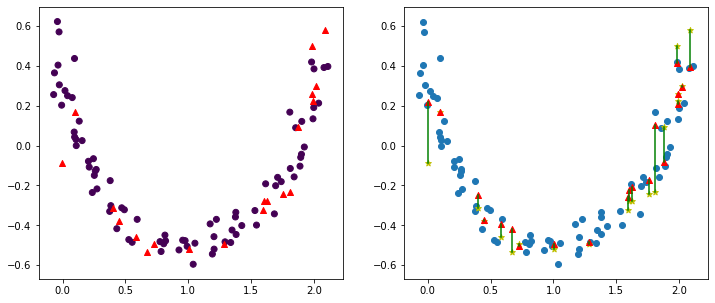

In [215]:
X1,Y1 = make_moons(n_samples=200, noise=.05, random_state=2)
X1 = X1[Y1 == 1]
Y1 = Y1[Y1 == 1]
xtr, xte, ytr, yte = train_test_split(X1, Y1, test_size=.2, random_state=2)
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
axes[0].scatter(xtr[:,0], xtr[:,1], c=ytr)
axes[0].scatter(xte[:,0], xte[:,1], c='r', marker='^')
knn = KNNRegression()
xtr_1 = xtr[:,0]
ytr_1 = xtr[:,1]
xte_1 = xte[:,0]
yte_1 = xte[:,1]
knn.train(xtr_1, ytr_1)
yp = knn.predict(xte_1, k=2)
axes[1].scatter(xtr_1, ytr_1)
axes[1].scatter(xte_1, yte_1, c='y', marker='*')
axes[1].scatter(xte_1, yp, c='r', marker='^')
for xi,yi1,yi2 in zip(xte_1, yp, yte_1):
    axes[1].plot([xi,xi], [yi1,yi2], c='g')
fig.savefig("1_moon_knn_regression.png", dpi=150)

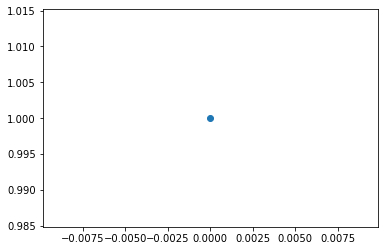

In [209]:
plt.scatter(0,1)